# Майнор по Анализу Данных, Группы ИАД-3 и ИАД-4
## Домашнее задание №3 
## Обо всем понемножку
Задание составлено с использованием материалов А. Шестакова

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Загрузим файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [4]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [5]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [6]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [7]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [82]:
len(table_data)

990

## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
random_state = 0

In [224]:
lb = LabelEncoder()
lb.fit(table_data['species'])
X, y = table_data.drop(['species', 'id'], axis=1), lb.transform(table_data['species'])

В датасете 10 элементов каждого класса, если задать test_size=0.2, то в тестовой выборке будет как раз по 2 элемента из класса

In [50]:
sss = StratifiedShuffleSplit(y, 1, test_size=0.2, random_state=random_state)
train_index, test_index = None, None
for train_index, test_index in sss:
    pass

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [51]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


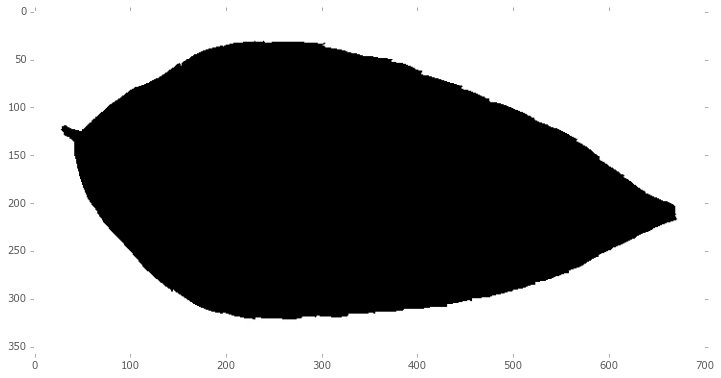

In [35]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [36]:
from scipy.misc import imresize

In [37]:
img_resized = imresize(img, (100, 100))

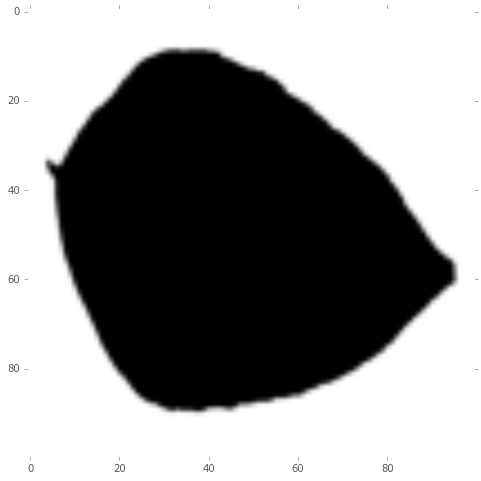

In [38]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [102]:
images_raw = []
for i in range(1, len(y)+1):
    images_raw += [imresize(plt.imread('./data/images/{}.jpg'.format(i)), (100, 100))]
'''
for filename in os.listdir('./data/images/'):
    if '.jpg' in filename and:
        print filename
        images_raw += [imresize(plt.imread('./data/images/'+filename), (100, 100))]
'''

"\nfor filename in os.listdir('./data/images/'):\n    if '.jpg' in filename and:\n        print filename\n        images_raw += [imresize(plt.imread('./data/images/'+filename), (100, 100))]\n"

In [103]:
len(images_raw)

990

In [104]:
images_vec = np.array([np.ravel(img) for img in images_raw])

In [152]:
imgs_train, imgs_test = np.array(images_raw)[train_index], np.array(images_raw)[test_index]
vimgs_train, vimgs_test = images_vec[train_index], images_vec[test_index]

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

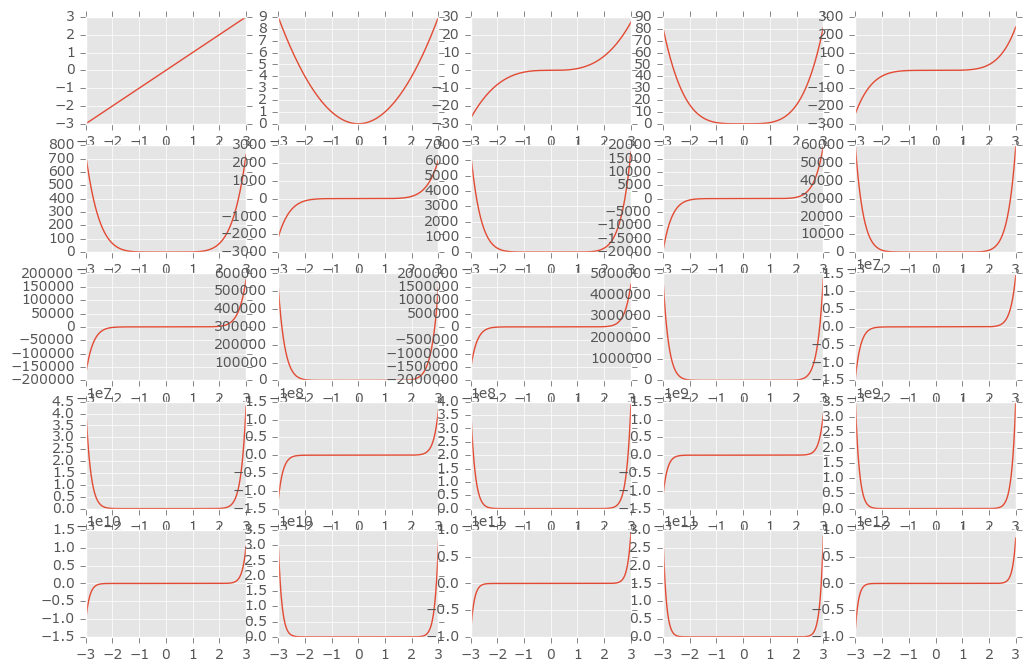

In [19]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

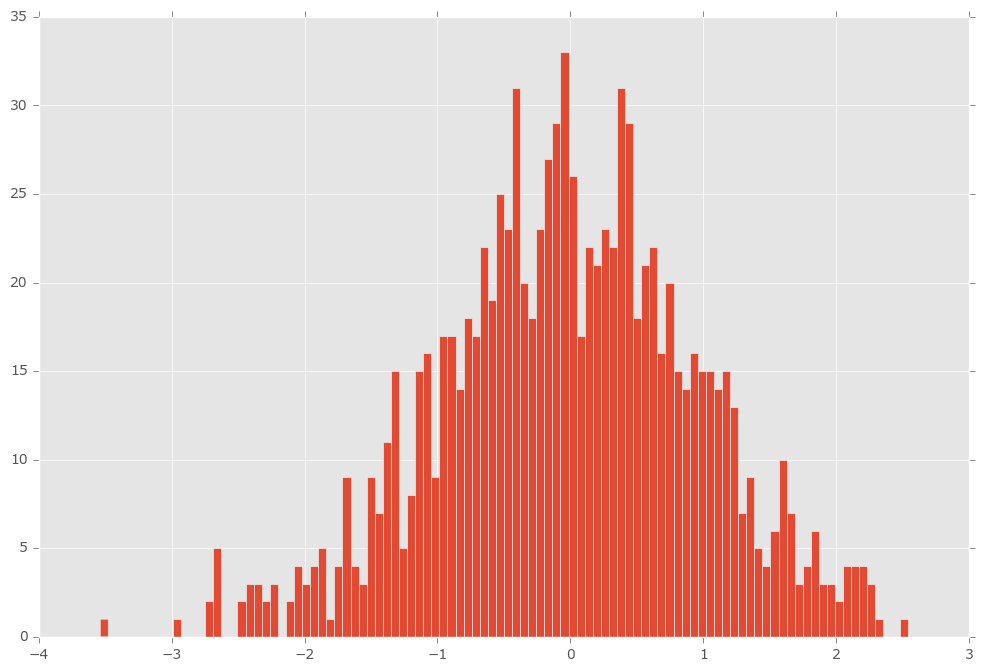

In [21]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них sample, используйте вектоизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

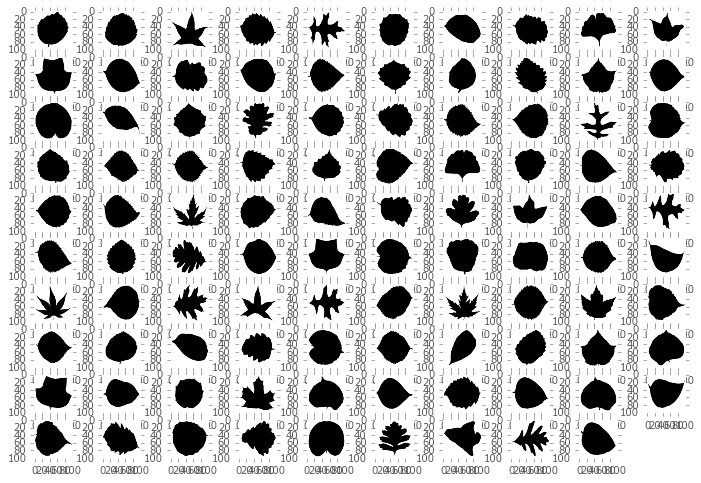

In [107]:
clases = set({})
i = 0
for ind in train_index:
    if y[ind] not in clases:
        i += 1
        clases.add(y[ind])
        plt.subplot(10, 10, i)
        plt.imshow(images_raw[ind], cmap='Greys')
        plt.grid(None)

In [108]:
pix_inds = np.random.choice(10000, 99)

In [109]:
len(pix_inds)

99

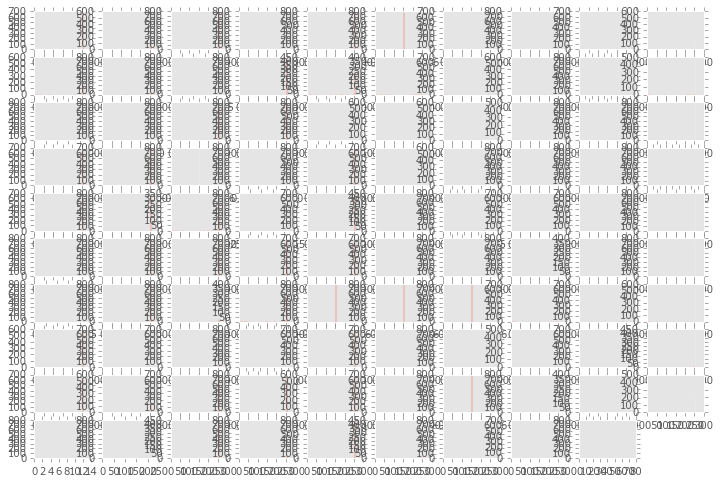

In [110]:
for i, pix_ind in enumerate(pix_inds):
    plt.subplot(10, 10, i+1)
    plt.hist([vimg[pix_ind] for vimg in vimgs_train], bins=100)
    plt.grid(None)

Средний лист

In [111]:
avg_img = np.mean(images_raw, axis=0)

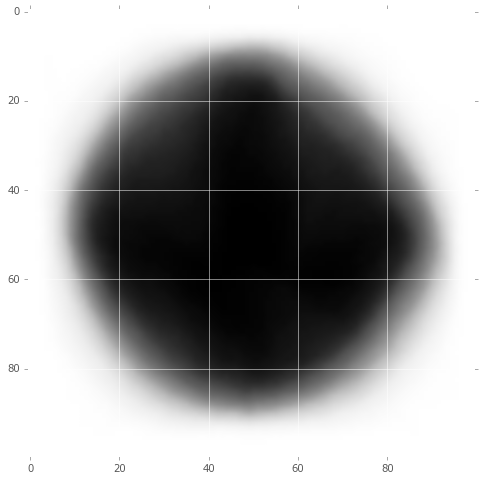

In [112]:
plt.imshow(avg_img, cmap='Greys')

Разброс

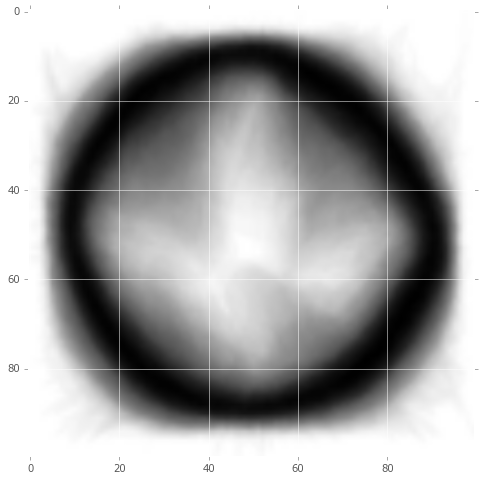

In [113]:
std_img = np.std(images_raw, axis=0)
plt.imshow(std_img, cmap='Greys')

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

Отличить можно, но явно не все: есть "угловатые", "круглые", "продолговатые"...
Бинаризуя изображения мы сохраняем только информацию о форме объекта, если мы хотим классифицировать листья по их форме, то такой подход кажется вполне адекватным. В качестве порога можно брать среднее, или медиану.
Средний лист -- просто пятно, константные значения принимают пиксели в середине изображения (они черные) и по краям (белые).

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [118]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

В этой версии баг в tsne, выдает ошибку array must not contain infs or NaNs, в массиве nan и inf нет

In [153]:
vvimgs_train = np.array([np.array([float(num) for num in arr]) for arr in vimgs_train])

In [154]:
vvimgs_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [155]:
new_vimgs_train = tsne.fit_transform(vvimgs_train)

ValueError: array must not contain infs or NaNs

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

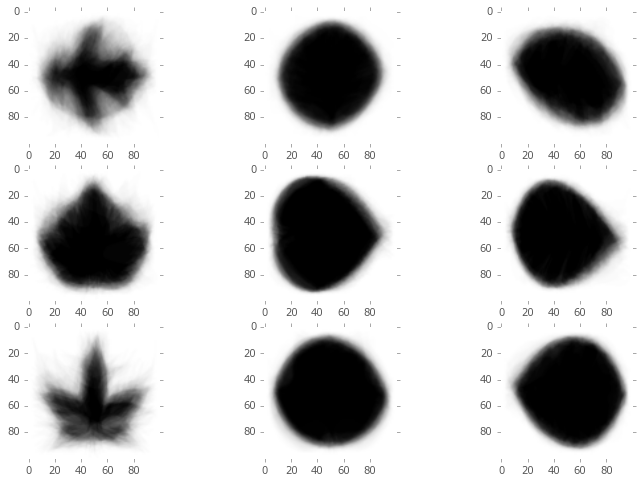

In [163]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
labels = kmeans.fit_predict(vimgs_train)

for i, center in enumerate(kmeans.cluster_centers_):
    plt.subplot(3, 3, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

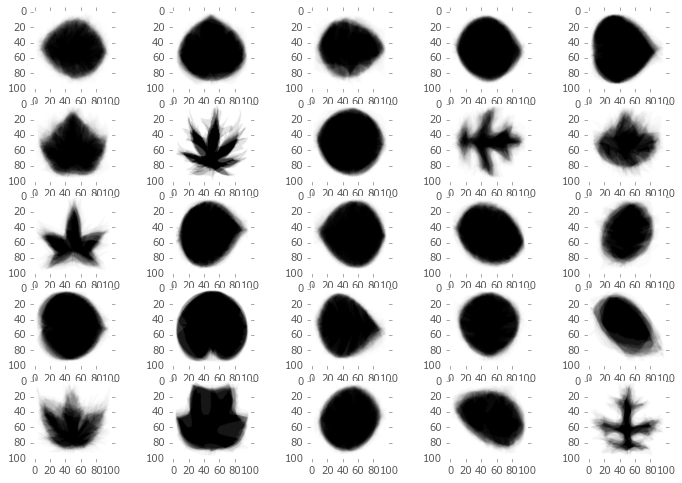

In [164]:
kmeans = KMeans(n_clusters=25)
labels = kmeans.fit_predict(vimgs_train)

for i, center in enumerate(kmeans.cluster_centers_):
    plt.subplot(5, 5, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

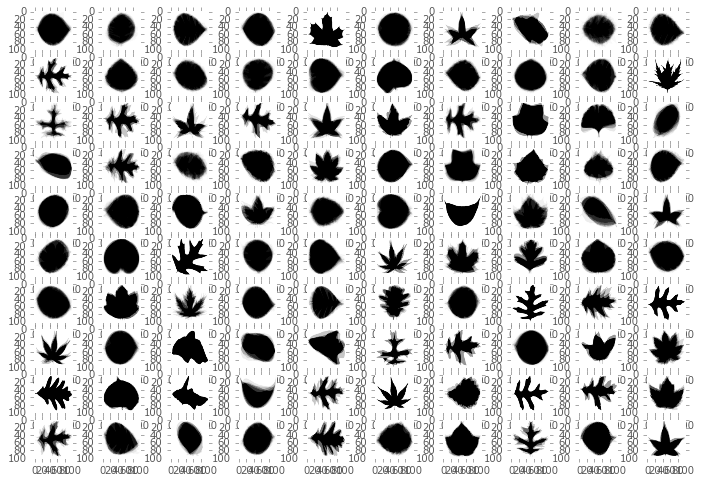

In [165]:
kmeans = KMeans(n_clusters=100)
labels = kmeans.fit_predict(vimgs_train)

for i, center in enumerate(kmeans.cluster_centers_):
    plt.subplot(10, 10, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

Еще как похожи!
Чем меньше кластеров, тем более размытые листья: оно и понятно, ведь каждый центр -- это в идеале среднее по элементам кластера, а если кластеров меньше чем классов, то среднее между несколькими классами.

Похожие среди кластеров есть, как были похожие и среди элементов разных классов.
лучше всего 99, это в точности совпадает с числом классов, результат для 100 говорит сам за себя.

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распрделение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature_log_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [170]:
from sklearn.neighbors import NearestCentroid

In [171]:
nsc = NearestCentroid()

In [173]:
nsc.fit(vimgs_train, y[train_index])

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [174]:
import sklearn as skl

Accuracy score

In [179]:
skl.metrics.accuracy_score(nsc.predict(vimgs_test), y[test_index])

0.010101010101010102

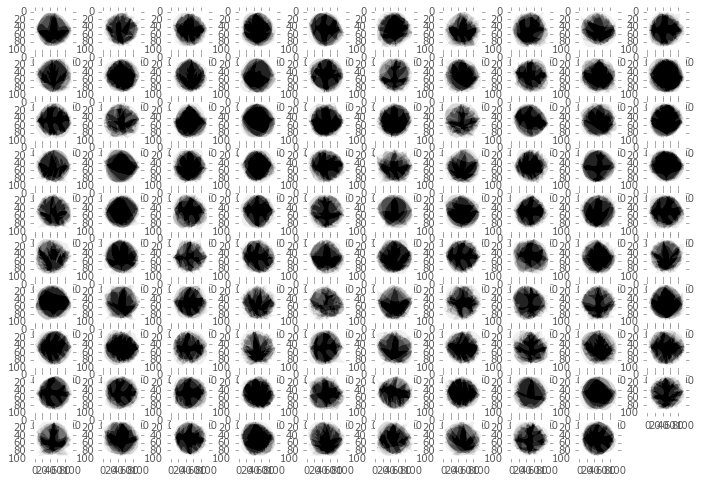

In [182]:
for i, center in enumerate(nsc.centroids_):
    plt.subplot(10, 10, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

Теперь наивный Байесовский

0.0151515151515


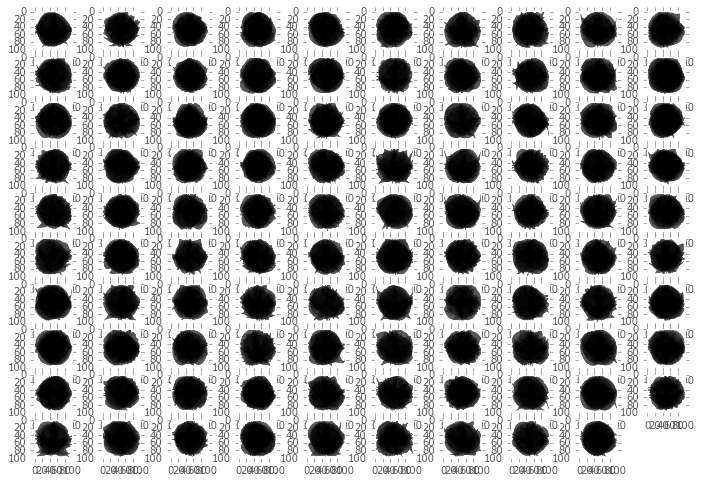

In [206]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(vimgs_train, y[train_index])

print skl.metrics.accuracy_score(mnb.predict(vimgs_test), y[test_index])

for i, center in enumerate(mnb.feature_log_prob_):
    plt.subplot(10, 10, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
lgst = LogisticRegression()
lgst.fit(vimgs_train, y[train_index])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
skl.metrics.accuracy_score(lgst.predict(vimgs_test), y[test_index])

0.010101010101010102

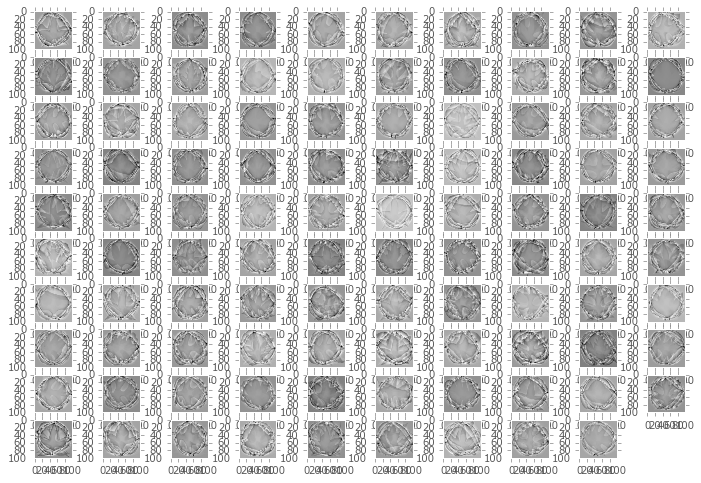

In [197]:
for i, center in enumerate(lgst.coef_):
    plt.subplot(10, 10, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

Лучше всего работает байесовский классификатор, но не на много.
Центры кластеров похожи на суперпозиции листьев, вероятности на наложенные друг на друга листья (на отдельных представителей совсем не похожи), веса по похожести занимают третье место.
Веса линейного классификатора -- это мера того, на сколько важен каждый пиксель. Самыми важными являются пиксели на контурах листьев, поэтому картинки очень напоминают картинку разброса пикселей из задания визуализации.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(vimgs_train, y[train_index])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
skl.metrics.accuracy_score(rf.predict(vimgs_test), y[test_index])

0.015151515151515152

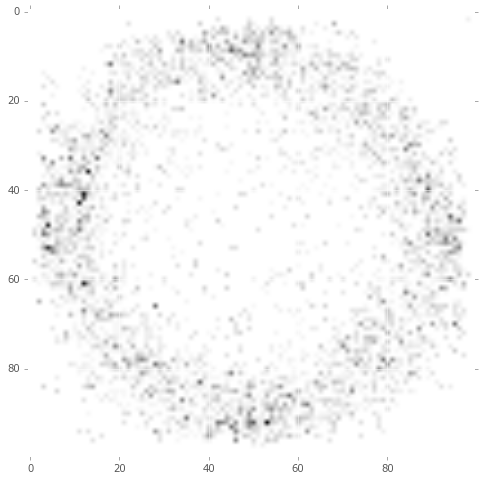

In [202]:
plt.imshow(rf.feature_importances_.reshape((100,100)), cmap='Greys')

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые FR определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

Не очень, по тем же причинам что и для линейного классификатора (см. объяснение выше)

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы пидумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

0.00505050505051


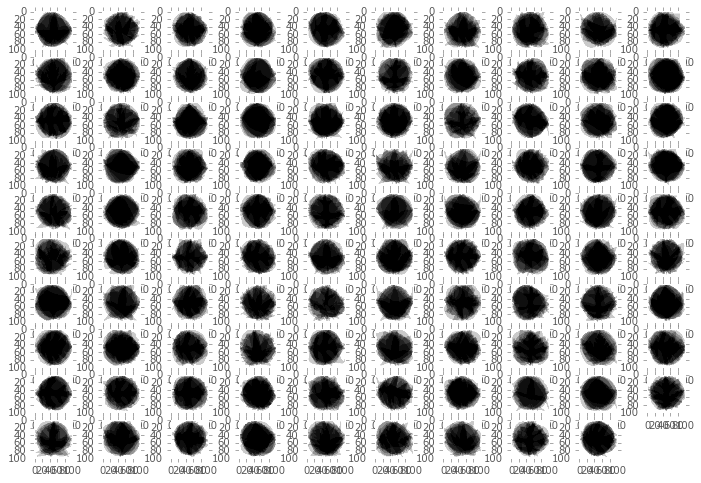

In [205]:
from sklearn.naive_bayes import BernoulliNB

mnb = BernoulliNB()
mnb.fit(vimgs_train, y[train_index])

print skl.metrics.accuracy_score(mnb.predict(vimgs_test), y[test_index])

for i, center in enumerate(mnb.feature_log_prob_):
    plt.subplot(10, 10, i+1)
    plt.imshow(center.reshape((100,100)), cmap='Greys')
    plt.grid(None)

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

Качество сильно ухудшилось, а картинки как не были похожими так и не стали.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [22]:
num_components = 2**np.arange(10)

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждог опризнака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [245]:
from sklearn.feature_selection import SelectKBest

In [246]:
sk = SelectKBest()

In [247]:
sk.fit(vimgs_train, y[train_index])

/Users/taras-st/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ..., 9997 9998 9999] are constant.
  UserWarning)


SelectKBest(k=10, score_func=<function f_classif at 0x128e28848>)

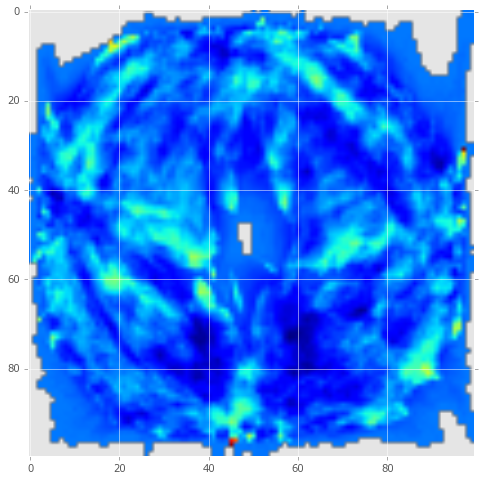

In [248]:
plt.imshow(sk.scores_.reshape((100,100)))

Похоже на чье-то узи, пол пока не ясен.

Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [212]:
from sklearn.grid_search import GridSearchCV

In [219]:
rf = RandomForestClassifier()

In [220]:
params = {'n_estimators': [5,10,15], 'max_features': ['auto', 'sqrt', 'log2']}

In [221]:
gcv = GridSearchCV(rf, param_grid=params, cv=4)

In [228]:
gcv.fit(np.array(X)[train_index], y[train_index])

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

In [229]:
gcv.best_params_

{'max_features': 'log2', 'n_estimators': 15}

In [230]:
rf = RandomForestClassifier(max_features='log2', n_estimators=15)

In [231]:
rf.fit(np.array(X)[train_index], y[train_index])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [233]:
skl.metrics.accuracy_score(rf.predict(np.array(X)[test_index]), y[test_index])

0.9242424242424242

Вот это качество!

In [234]:
predicted = rf.predict(np.array(X)[test_index])

/Users/taras-st/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


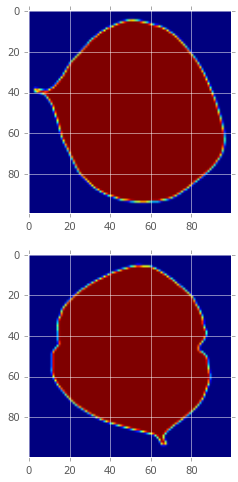

In [244]:
for i, leaf in enumerate(test_index):
    if predicted[i] != y[leaf]:
        plt.subplot(2,1,1)
        plt.imshow(imgs_test[i].reshape((100,100)))
        plt.subplot(2,1,2)
        plt.imshow(imgs_test[(y[test_index]==predicted[i])[0]])
        break

Изображения и правда похожи

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.